# Coding a simple decision tree with median and 70/30 ratio
***

This notebook was developed from an initial template given by **Code Canteen** and data scientist Lila Rose. They can be reach at http://futurecoders.org.uk/. The initial work was based on using medians as indicators and a train/test ratio of 80/20.<br>

In the following notebooks, we will use different ratios and different indicators, to see how the decision trees change (or not). For the complete explanations, please refer to the notebook *Decision-Tree-coded-model-Median-80-20*.

Author of the final document: Ester Giménez Mojón.

In this worksheet we are going to code a decision tree, which will use the calculated probabilities to make decisions about wheter a row of given data would be classified as `Iris-virginica`, `Iris setosa` or `Iris versicolor`, or not, based on sepal and petal dimensions. With this information, species would be further predicted by probabilities of error.

This notebook will provide a decision tree for every one of the three different types of Iris considered. Each tree will be independent of each other.

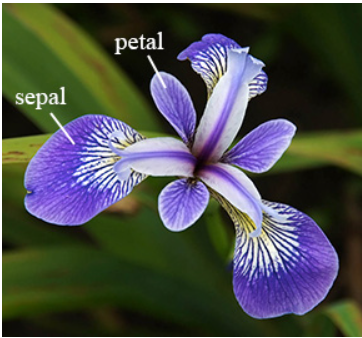

### 1. READ THE IRIS DATASET
***

Like with the previous notebook, we will use the same iris dataset, located at https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data.<br>

The columns in the CSV file do not have headings, so we need to add them:<br>

> url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"<br>
> names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']<br>
> iris_data = pd.read_csv(url, name=names)<br>

I am not going to repeat the calculations for the unique values, max, min, etc, as all can be found in the first notebook.<br>

There are 150 rows of data, no empty spaces.<br>

Median is the middle of the data, the 50% quantile of the dataset.describe().<br>

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)
iris_data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [2]:
iris_data.median()

sepal-length    5.80
sepal-width     3.00
petal-length    4.35
petal-width     1.30
dtype: float64

In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2. SPLIT THE DATA INTO TRAIN AND TEST DATASETS
***

In this case, I will use 70% train, 30% test as the split.

In [4]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from all columns
train, test = train_test_split(iris_data, test_size=0.30, random_state=2)
# random_state fixes the results of the calculation every time that the whole notebook is run, otherwise it will show
# different results, due to the random test_size, as it will choose different items every time.
train.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.887619,3.057143,3.829524,1.220952
std,0.820494,0.442862,1.765749,0.760275
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.400000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The splitting will be used later, to see if the remaining data (the test set) relates very well with the train set.<br>

In order to manage decision trees, we need to decide which item we will use as a discriminator for separating values above and below it. We can use the median, the mean, quartiles (25 or 75), etc. In this case, I will use the median again, because I want to know the effect of a different split train/test.<br>

Steps to be done in this process:<br>

1. We calculate the general median of every column with the complete set of data (iris_data).<br>
2. We calculate the probability in every column, of how many items are above or below the calculated median.<br>
3. We calculate the condicional probability in every column, of elements being above or below the median and at the same time of being of a specific type of iris.<br>
4. We calculate the Gini Index of every column, with the Gini Indexes of the conditional probabilities for every above and below column.<br>

### 3. ASSUMPTIONS
***

Same as in the previous notebook, we will only use the data we have on the 3 species as a representation of the species.

In [5]:
sl_indicator = iris_data['sepal-length'].median()
sw_indicator = iris_data['sepal-width'].median()
pl_indicator = iris_data['petal-length'].median()
pw_indicator = iris_data['petal-width'].median()

print(sl_indicator, sw_indicator, pl_indicator, pw_indicator)
display(train.describe())

5.8 3.0 4.35 1.3


,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.887619,3.057143,3.829524,1.220952
std,0.820494,0.442862,1.765749,0.760275
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.400000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


When the four medians are compared to the output of train.describe(), they have changed slightly after the splitting.<br>

- medians of the whole set: 5.8, 3.0, 4.35, 1.3<br>
- medians after split (50% quantile): 5.8, 3.0, 4.4, 1.4<br>

### 4. PROPORTION OF VALUES ON or ABOVE AND BELOW THE INDICATOR
***

This calculates the probability of elements in a specified column, that are:<br>

- **above** the median in relation to the total number of elements in that column. <br>
- **below** the median in relation to the total number of elements of the column.<br>

This will be used to calculate the Gini Index of the above and the below values.

__SEPAL LENGHT__

In [6]:
# Calculate the proportion of values in sepal-length column that are on or above the median
sl_vi_above_indicator = train[train['sepal-length'] >= sl_indicator]['sepal-length'].count() / train['sepal-length'].count()
sl_vi_below_indicator = train[train['sepal-length'] < sl_indicator]['sepal-length'].count() / train['sepal-length'].count()
print(sl_vi_above_indicator)
print(sl_vi_below_indicator)

0.5333333333333333
0.4666666666666667


__SEPAL WIDTH__

In [7]:
# Calculate the proportion of values in sepal-width column that are on or above the median
sw_indicator_vi_above = train[train['sepal-width'] >= sw_indicator]['sepal-width'].count() / train['sepal-width'].count()
sw_indicator_vi_below = train[train['sepal-width'] < sw_indicator]['sepal-width'].count() / train['sepal-width'].count()
print(sw_indicator_vi_above)
print(sw_indicator_vi_below)

0.6190476190476191
0.38095238095238093


__PETAL LENGHT__

In [8]:
# Calculate the proportion of values in petal-length column that are on or above the median
pl_vi_above_indicator = train[train['petal-length'] >= pl_indicator]['petal-length'].count() / train['petal-length'].count()
pl_vi_below_indicator = train[train['petal-length'] < pl_indicator]['petal-length'].count() / train['petal-length'].count()
print(pl_vi_above_indicator)
print(pl_vi_below_indicator)

0.5238095238095238
0.47619047619047616


__PETAL WIDTH__

In [9]:
# Calculate the proportion of values in petal-width column that are on or above the median
pw_vi_above_indicator = train[train['petal-width'] >= pw_indicator]['petal-width'].count() / train['petal-width'].count()
pw_vi_below_indicator = train[train['petal-width'] < pw_indicator]['petal-width'].count() / train['petal-width'].count()
print(pw_vi_above_indicator)
print(pw_vi_below_indicator)

0.5523809523809524
0.44761904761904764


The results are as follow:

|MEDIAN|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------|------------|-----------|------------|-----------| 
|xx_vi_above_indicator|0.5333|0.6190|0.5238|0.5524|
|xx_vi_below_indicator|0.4666|0.38095|0.4762|0.4476|

### 5 - CALCULATION OF THE PROPORTION OF VALUES (CONDITIONED PROBABILITY) ON OR ABOVE THE INDICATOR THAT ARE OF A GIVEN SPECIES 

We will calculate the probability of a row being on or above the indicator and of a given species at the same time. <br>
The same will be done with the rows being under the indicator and of a given species at the same time.<br>
The calculations will be done for every column as well.<br>

The steps would be, for example:<br>

- Filter by values in the sepal-length column that are on or above the median (sl_indicator) and the species column being Iris-virginica.<br>
- Filter by values in the sepal-length column that are on or above the median (sl_indicator) only.<br>
- Divide both results.<br>

Instead of filtering the columns again and repeating the steps above to know which numbers are ON or ABOVE the indicator and NOT of one of the given species, we will do a substraction:<br>

> = 1 - (the proportion of those that are Iris virginica)<br>

### 5.1 - On or above the indicator and `Iris virginica` 

In [34]:
# calculate the proportion of results where the value is on or above median that are of the species Iris-virginica
sl_vi_above = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-virginica')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-virginica')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-virginica')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-virginica')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above, sw_vi_above, pl_vi_above, pw_vi_above)

0.625 0.3230769230769231 0.6727272727272727 0.6379310344827587


In [35]:
# calculate the proportion of results where the column is above median that are NOT of the species Iris-virginica
no_sl_vi_above = 1 - sl_vi_above
no_sw_vi_above = 1 - sw_vi_above
no_pl_vi_above = 1 - pl_vi_above
no_pw_vi_above = 1 - pw_vi_above

print(no_sl_vi_above, no_sw_vi_above, no_pl_vi_above, no_pw_vi_above)

0.375 0.676923076923077 0.32727272727272727 0.3620689655172413


The results for `Iris Virginica` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|above Iris v.|0.625|0.3231|0.6727|0.6379|
|above not Iris v.|0.375|0.6769|0.3272|0.3621|

### 5.2 - On or above the indicator and `Iris setosa`

In [36]:
# calculate the proportion of results where the value is on or above median that are of the species Iris-setosa
sl_vi_above_cet = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-setosa')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above_cet = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-setosa')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above_cet = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-setosa')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above_cet = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-setosa')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above_cet, sw_vi_above_cet, pl_vi_above_cet, pw_vi_above_cet)

0.0 0.49230769230769234 0.0 0.0


In [37]:
# calculate the proportion of results where the column is above median that are NOT of the species Iris-setosa

no_sl_vi_above_cet = 1 - sl_vi_above_cet
no_sw_vi_above_cet = 1 - sw_vi_above_cet
no_pl_vi_above_cet = 1 - pl_vi_above_cet
no_pw_vi_above_cet = 1 - pw_vi_above_cet

print(no_sl_vi_above_cet, no_sw_vi_above_cet, no_pl_vi_above_cet, no_pw_vi_above_cet)

1.0 0.5076923076923077 1.0 1.0


The results for `Iris setosa` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|above Iris set.|0.0|0.492|0.0|0.0|
|above not Iris set.|1.0|0.5077|1.0|1.0|

### 5.3 - On or above the indicator and `Iris versicolor`

In [38]:
# calculate the proportion of results where the value is on or above median that are of the species Iris-versicolor
sl_vi_above_ver = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above_ver = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above_ver = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-versicolor')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above_ver = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-versicolor')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above_ver, sw_vi_above_ver, pl_vi_above_ver, pw_vi_above_ver)

0.375 0.18461538461538463 0.32727272727272727 0.3620689655172414


In [39]:
# calculate the proportion of results where the column is above median that are NOT of the species Iris-versicolor
no_sl_vi_above_ver = 1 - sl_vi_above_ver
no_sw_vi_above_ver = 1 - sw_vi_above_ver
no_pl_vi_above_ver = 1 - pl_vi_above_ver
no_pw_vi_above_ver = 1 - pw_vi_above_ver

print(no_sl_vi_above_ver, no_sw_vi_above_ver, no_pl_vi_above_ver, no_pw_vi_above_ver)

0.625 0.8153846153846154 0.6727272727272727 0.6379310344827587


The results for `Iris versicolor` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|above Iris ver.|0.375|0.1846|0.3273|0.3621|
|above not Iris ver.|0.625|0.8154|0.6727|0.6379|

### 6 - CALCULATION OF THE PROPORTION OF VALUES (CONDITIONED PROBABILITY) BELOW THE INDICATOR THAT ARE OF A GIVEN SPECIES 

Same as section 5 but below the indicator.

### 6.1 - Below median and `Iris virginica`

In [40]:
# calculate the proportion of results where the value is below median that are of the species Iris-virginica

sl_vi_below = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-virginica')]['sepal-length'].count() / (train[train['sepal-length'] < sl_indicator]['sepal-length'].count())
sw_vi_below = (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-virginica')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-virginica')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-virginica')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())

print(sl_vi_below, sw_vi_below, pl_vi_below, pw_vi_below)

0.04081632653061224 0.4 0.0 0.0


In [41]:
# calculate the proportion of results where the column is below median that are NOT of the species Iris-virginica

no_sl_vi_below = 1-sl_vi_below
no_sw_vi_below = 1-sw_vi_below
no_pl_vi_below = 1-pl_vi_below
no_pw_vi_below = 1-pw_vi_below

print(no_sl_vi_below, no_sw_vi_below, no_pl_vi_below, no_pw_vi_below)

0.9591836734693877 0.6 1.0 1.0


The results for `Iris Virginica` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris vir.|0.0408|0.4|0.0|0.0|
|below not Iris vir.|0.95918|0.6|1.0|1.0|

### 6.2 - Below median and `Iris setosa`

In [42]:
# calculate the proportion of results where the value is below median that are of the species Iris-setosa

sl_vi_below_set = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-setosa')]['sepal-length'].count() / train[train['sepal-length'] < sl_indicator]['sepal-length'].count()
sw_vi_below_set= (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-setosa')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below_set = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-setosa')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below_set = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-setosa')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())

print(sl_vi_below_set, sw_vi_below_set, pl_vi_below_set, pw_vi_below_set)

0.673469387755102 0.025 0.66 0.7021276595744681


In [43]:
# calculate the proportion of results where the column is below median that are NOT of the species Iris-setosa

no_sl_vi_below_set = 1-sl_vi_below_set
no_sw_vi_below_set = 1-sw_vi_below_set
no_pl_vi_below_set = 1-pl_vi_below_set
no_pw_vi_below_set = 1-pw_vi_below_set

print(no_sl_vi_below_set, no_sw_vi_below_set, no_pl_vi_below_set, no_pw_vi_below_set)

0.326530612244898 0.975 0.33999999999999997 0.2978723404255319


The results for `Iris setosa` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris set.|0.6735|0.025|0.66|0.702|
|below not Iris set.|0.3265|0.975|0.3399|0.2979|

### 6.3 Below median and `Iris versicolor`

In [44]:
# calculate the proportion of results where the value is below median that are of the species Iris-versicolor

sl_vi_below_ver = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-length'].count() / train[train['sepal-length'] < sl_indicator]['sepal-length'].count()
sw_vi_below_ver= (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below_ver = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-versicolor')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below_ver = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-versicolor')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())

print(sl_vi_below_ver, sw_vi_below_ver, pl_vi_below_ver, pw_vi_below_ver)

0.2857142857142857 0.575 0.34 0.2978723404255319


In [45]:
# calculate the proportion of results where the column is below median that are NOT of the species Iris-versicolor

no_sl_vi_below_ver = 1-sl_vi_below_ver
no_sw_vi_below_ver = 1-sw_vi_below_ver
no_pl_vi_below_ver = 1-pl_vi_below_ver
no_pw_vi_below_ver = 1-pw_vi_below_ver

print(no_sl_vi_below_ver, no_sw_vi_below_ver, no_pl_vi_below_ver, no_pw_vi_below_ver)

0.7142857142857143 0.42500000000000004 0.6599999999999999 0.7021276595744681


The results for `Iris versicolor` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris ver.|0.2857|0.575|0.34|0.2978|
|below not Iris ver.|0.7143|0.425|0.6599|0.7021|

### 7 - Calculate Gini Index of the above and below parts, by species (not of the column).

Each time you split the data set into train and test, you will get a slightly 
different mix and so your train data set will be slightly different. We are 
going to try to look at how well we might predict a particular species from 
the 3 columns. Let's use the `Iris-virginica` species and try to predict if a 
row would be that species or not, based on the four dimensions columns.
<br>

A Gini Index is a measure of the probability of a randomly chosen prediction 
being incorrect. The most influential column will have the lowest Gini Index 
and that will be put at the top of our decision tree. <br>

The formula for the Gini Index is: <br>
<br>
Gini Index = 1 - (the sum of the squares of the proportion values calculated above) <br>
<br>
To calculate the Gini Index for, use the following example: <br>
<br>
gini_sl_vi = 1 - (sl_vi_above2 + no_sl_vi_above2)<br>

### 7.1 Gini Index of `Iris virginica` <br>

In [46]:
# calculate the Gini Index for the proportion of those above median which are Iris_virginica, for all four columns

gini_sl_vi_above = 1 - (sl_vi_above**2 + no_sl_vi_above**2)
gini_sw_vi_above = 1 - (sw_vi_above**2 + no_sw_vi_above**2)
gini_pl_vi_above = 1 - (pl_vi_above**2 + no_pl_vi_above**2)
gini_pw_vi_above = 1 - (pw_vi_above**2 + no_pw_vi_above**2)

print(gini_sl_vi_above, gini_sw_vi_above, gini_pl_vi_above, gini_pw_vi_above)

0.46875 0.43739644970414193 0.44033057851239665 0.461950059453032


In [47]:
# calculate the Gini Index for the proportion of those below median which are Iris_virginica, for all four columns

gini_sl_vi_below = 1 - (sl_vi_below**2 + no_sl_vi_below**2)
gini_sw_vi_below = 1 - (sw_vi_below**2 + no_sw_vi_below**2)
gini_pl_vi_below = 1 - (pl_vi_below**2 + no_pl_vi_below**2)
gini_pw_vi_below = 1 - (pw_vi_below**2 + no_pw_vi_below**2)

print(gini_sl_vi_below, gini_sw_vi_below, gini_pl_vi_below, gini_pw_vi_below)

0.07830070803831746 0.48 0.0 0.0


The results for `Iris Virginica` are as follow:

|Gini Index I.virg|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|-----------------|------------|-----------|------------|-----------| 
|above|0.46875|0.4374|0.4403|0.4619|
|below|0.0783|0.48|0.0|0.0|

### 7.2 Gini Index of `Iris setosa` <br>

In [48]:
# calculate the Gini Index for the proportion of those above median which are Iris_setosa, for all four columns

gini_sl_vi_above_cet = 1 - (sl_vi_above_cet**2 + no_sl_vi_above_cet**2)
gini_sw_vi_above_cet = 1 - (sw_vi_above_cet**2 + no_sw_vi_above_cet**2)
gini_pl_vi_above_cet = 1 - (pl_vi_above_cet**2 + no_pl_vi_above_cet**2)
gini_pw_vi_above_cet = 1 - (pw_vi_above_cet**2 + no_pw_vi_above_cet**2)

print(gini_sl_vi_above_cet, gini_sw_vi_above_cet, gini_pl_vi_above_cet, gini_pw_vi_above_cet)

0.0 0.49988165680473373 0.0 0.0


In [49]:
# calculate the Gini Index for the proportion of those below median which are Iris_setosa, for all four columns

gini_sl_vi_below_set = 1 - (sl_vi_below_set**2 + no_sl_vi_below_set**2)
gini_sw_vi_below_set = 1 - (sw_vi_below_set**2 + no_sw_vi_below_set**2)
gini_pl_vi_below_set = 1 - (pl_vi_below_set**2 + no_pl_vi_below_set**2)
gini_pw_vi_below_set = 1 - (pw_vi_below_set**2 + no_pw_vi_below_set**2)

print(gini_sl_vi_below_set, gini_sw_vi_below_set, gini_pl_vi_below_set, gini_pw_vi_below_set)

0.4398167430237401 0.04875000000000007 0.4488 0.41828881846989585


The results for `Iris setosa` are as follow:

|Gini Index I.setosa|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|-------------------|------------|-----------|------------|-----------| 
|above|0.0|0.4999|0.0|0.0|
|below|0.4398|0.04875|0.4488|0.4183|

### 7.3 Gini Index of `Iris versicolor` <br>

In [26]:
# calculate the Gini Index for the proportion of those above median which are Iris_versicolor, for all four columns

gini_sl_vi_above_ver = 1 - (sl_vi_above_ver**2 + no_sl_vi_above_ver**2)
gini_sw_vi_above_ver = 1 - (sw_vi_above_ver**2 + no_sw_vi_above_ver**2)
gini_pl_vi_above_ver = 1 - (pl_vi_above_ver**2 + no_pl_vi_above_ver**2)
gini_pw_vi_above_ver = 1 - (pw_vi_above_ver**2 + no_pw_vi_above_ver**2)

print(gini_sl_vi_above_ver, gini_sw_vi_above_ver, gini_pl_vi_above_ver, gini_pw_vi_above_ver)

0.46875 0.30106508875739646 0.44033057851239665 0.461950059453032


In [27]:
# calculate the Gini Index for the proportion of those below median which are Iris_versicolor, for all four columns

gini_sl_vi_below_ver = 1 - (sl_vi_below_ver**2 + no_sl_vi_below_ver**2)
gini_sw_vi_below_ver = 1 - (sw_vi_below_ver**2 + no_sw_vi_below_ver**2)
gini_pl_vi_below_ver = 1 - (pl_vi_below_ver**2 + no_pl_vi_below_ver**2)
gini_pw_vi_below_ver = 1 - (pw_vi_below_ver**2 + no_pw_vi_below_ver**2)

print(gini_sl_vi_below_ver, gini_sw_vi_below_ver, gini_pl_vi_below_ver, gini_pw_vi_below_ver)

0.40816326530612246 0.48875 0.4488000000000001 0.41828881846989585


The results for `Iris versicolor` are as follow:

|Gini Index I.vers|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|-----------------|------------|-----------|------------|-----------| 
|above|0.46875|0.3011|0.4403|0.4619|
|below|0.40816|0.48875|0.4488|0.4183|

### 8 - Add weights to the index

### 8.1 - Gini Index of `Iris virginica`

In [50]:
# Calculate the weighted Gini Index for sepal-lenght
weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above + sl_vi_below_indicator * gini_sl_vi_below
print(weighted_gini_sl_vi)

0.28654033041788146


In [51]:
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_vi = sw_indicator_vi_above * gini_sw_vi_above + sw_indicator_vi_below * gini_sw_vi_below
print(weighted_gini_sw_vi)

0.45362637362637354


In [52]:
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above + pl_vi_below_indicator * gini_pl_vi_below
print(weighted_gini_pl_vi)

0.23064935064935063


In [53]:
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above + pw_vi_below_indicator * gini_pw_vi_below
print(weighted_gini_pw_vi)

0.2551724137931034


The results for `Iris virginica` are as follow:

|Total Gini Index I.virg|Results|
|-----------------------|-------| 
|SEPAL LENGTH|0.2865|
|SEPAL WIDTH|0.45363|
|PETAL LENGTH|0.23065|
|PETAL WIDTH|0.25517|

### 8.2 - Gini Index of `Iris setosa`

In [67]:
# calculate the proportion of values in sepal-length column that are on or above mean, then calculate the weighted Gini Index
weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above_cet + sl_vi_below_indicator * gini_sl_vi_below_set
print(weighted_gini_sl_vi)

0.2052478134110787


In [68]:
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_vi = sw_indicator_vi_above * gini_sw_vi_above_cet + sw_indicator_vi_below * gini_sw_vi_below_set
print(weighted_gini_sw_vi)

0.328021978021978


In [69]:
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above_cet + pl_vi_below_indicator * gini_pl_vi_below_set
print(weighted_gini_pl_vi)

0.2137142857142857


In [70]:
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above_cet + pw_vi_below_indicator * gini_pw_vi_below_set
print(weighted_gini_pw_vi)

0.18723404255319148


The results for `Iris setosa` are as follow:

|Total Gini Index I.setosa|Results|
|-------------------------|-------| 
|SEPAL LENGTH|0.20525|
|SEPAL WIDTH|0.32802|
|PETAL LENGTH|0.21371|
|PETAL WIDTH|0.18723|

### 8.3 - Gini Index of `Iris versicolor`

In [71]:
# calculate the proportion of values in sepal-length column that are on or above mean, then calculate the weighted Gini Index
weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above_ver + sl_vi_below_indicator * gini_sl_vi_below_ver
print(weighted_gini_sl_vi)

0.44047619047619047


In [72]:
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_vi = sw_indicator_vi_above * gini_sw_vi_above_ver + sw_indicator_vi_below * gini_sw_vi_below_ver
print(weighted_gini_sw_vi)

0.37256410256410255


In [73]:
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above_cet + pl_vi_below_indicator * gini_pl_vi_below_set
print(weighted_gini_pl_vi)

0.2137142857142857


In [74]:
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above_ver + pw_vi_below_indicator * gini_pw_vi_below_ver
print(weighted_gini_pw_vi)

0.4424064563462949


The results for `Iris versicolor` are as follow:

|Gini Index total|Results|
|----------------|-------| 
|SEPAL LENGTH|0.4405|
|SEPAL WIDTH|0.37256|
|PETAL LENGTH|0.21371|
|PETAL WIDTH|0.4424|

### 9 - MAKE A DECISION TREE

### 9.1 `Iris virginica`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Weight|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------|------------|-----------|------------|-----------|
|Weight|0.2865|0.45363|0.23065|0.25517|

The order of the nodes is:


1. Petal length
2. Petal width
3. Sepal length
4. Sepal width

The conditioned probabilities are:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|above Iris v.|0.625|0.3231|0.6727|0.6379|
|above not Iris v.|0.375|0.6769|0.3272|0.3621|

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris vir.|0.0408|0.4|0.0|0.0|
|below not Iris vir.|0.95918|0.6|1.0|1.0|

First node: **petal length**<br>
67% are above the median and are `Iris virginica` but 100% are **not below**, which means that this species goes in the split _above median_.<br>

This is the same as with a train/test of 80/20.

Second node: **petal width**<br>
64% are above the median and are `Iris virginica` but 100% are **not below**, which means that this species goes in the split _above median_.<br>

This is the same as with a train/test of 80/20.

Third node: **sepal length**<br>
62% are above the median and are `Iris virginica` but 96% are **not below**, which means that this species goes in the split _above median_.<br>

This is the same as with a train/test of 80/20.

Fourth node: **sepal width**<br>
32% are above the median and are `Iris virginica` and 40% are below and of teh same species.
This is not a big difference (8%) to use this characteristic to differentiate `Iris virginica` and if we use it, the result of the classification would not be very reliable.

The decision tree will be as follows:

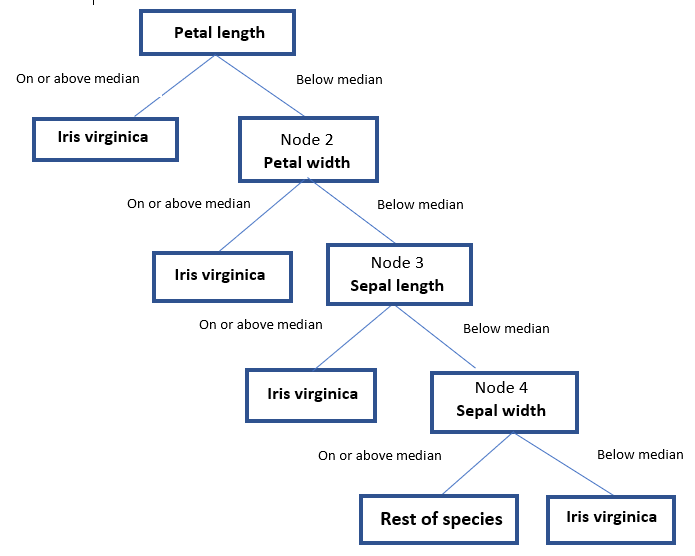

### 9.2 `Iris setosa`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Weight|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------|------------|-----------|------------|-----------|
|Weight|0.20525|0.32802|0.21371|0.18723|

The order of the nodes is:

1. Petal width
2. Sepal length
3. Petal length
4. Sepal width

The conditioned probabilities are:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris set.|0.0|0.492|0.0|0.0|
|above not Iris set.|1.0|0.5077|1.0|1.0|

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris set.|0.6735|0.025|0.66|0.702|
|below not Iris set.|0.3265|0.975|0.3399|0.2979|

First node: **petal width**<br>
66% are below the median and are `Iris setosa` and there are none above the median. This means that this species goes in the split _below median_.<br>

This is the same as with a train/test of 80/20.

Second node: **sepal length**<br>
67% are below the median and are `Iris setosa` and none are above the indicator. This species goes in the split _below median_.<br>

This is the same as with a train/test of 80/20.

Third node: **petal length**<br>
66% are below the median and are `Iris setosa` and none are above the indicator. This species goes in the split _below median_.<br>

This is the same as with a train/test of 80/20.

Fourth node: **sepal width**<br>
2.5% are below the median and are `Iris setosa` and 50% are above `Iris setosa` and not `Iris setosa`, which indicates that this split goes to _above median_.<br>

The decision tree will be as follows:

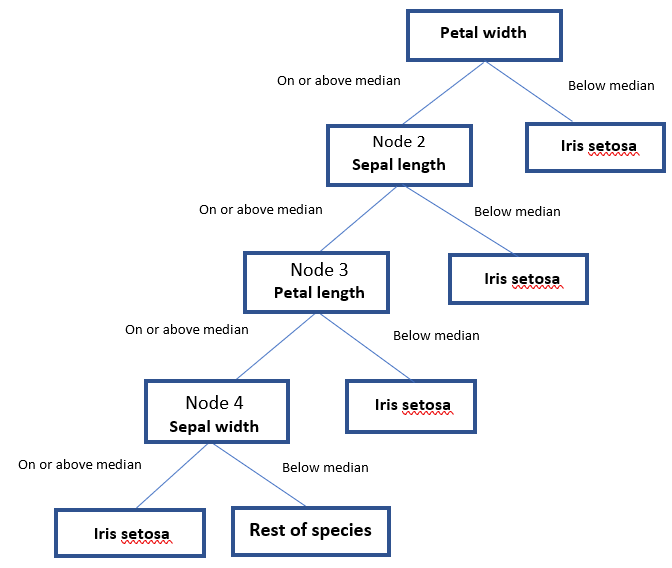

### 9.3 `Iris versicolor`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Weight|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------|------------|-----------|------------|-----------|
|Weight|0.4405|0.37256|0.21371|0.4424|

The order of the nodes is:
    
1. Petal length
2. Sepal width
3. Sepal length
4. Petal width

The 2 last ones are virtually indistinguishable (0.4405 and 0.4424) and in reality should not be used for a decision tree, however and for the purposes of this notebook, we will use them as if their probabilities were useful for classification.

The conditioned probabilities are:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|-----------------|------------|-----------|------------|-----------| 
|above Iris ver.|0.375|0.1846|0.3273|0.3621| 
|above not Iris ver.|0.625|0.8154|0.6727|0.6379|

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris ver.|0.2857|0.575|0.34|0.2978|
|below not Iris ver.|0.7143|0.425|0.6599|0.7021|

First node: **petal length**
only 33% are above and 34% are below, which is not useful for classification, because it provides 2 different trees in the first node. For simplification purposes, I will take **below** in the first node.

This decision tree is not very significative in general.

Second node: **sepal width**
81% are above not of the species but the below percentages are not useful. I can consider that `Iris versicolor` would be **below**.

Third node: **sepal length**
37% are above and 28% are below, so again the difference between the two (9%) is not useful for classification. For simplification purposes, I will take **above**.

Fourth node: **petal width**
36% are above and 30% are below. Again, the percentages are not significative, because there is a difference of 6% between both. As a continuation of our methodology, I will take **above** as it is bigger.

The decision tree will be as follows:

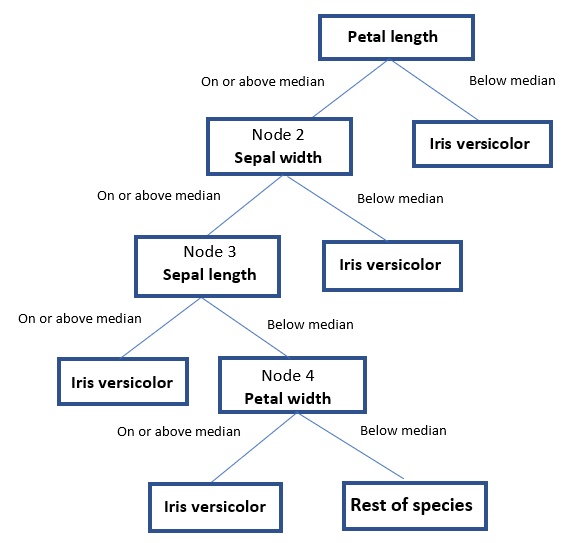

### 10 - EFFICIENCY OF THE DECISION TREES

#### 10.1 Test efficiency of the decision tree for `Iris virginica`.

In [7]:
def predict_species(df):
# RETURN None if petal-width is below pw_decision_line or if petal-length is below pl_decision_line, otherwise return 
  if df['petal-length'] >= pl_indicator:
    if df['petal-width'] >= pw_indicator:
        if df['sepal-length'] >= sl_indicator:
            #if df['sepal-width'] <= sw_indicator:
            #    return "Iris-virginica"
            #else:
            #    return None
            return "Iris-virginica"
        else:
            return None
    else:
        return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.26666666666666666


The efficiency of classification of Iris virginica is 26.7% if we consider the first 3 nodes. Including the fourth node, the efficiency decreases to 13%.<br>

The last node should not be used for classification purposes.

#### 10.2 Test efficiency of the decision tree for `Iris setosa`.

In [11]:
def predict_species(df):
    if df['petal-width'] <= pw_indicator:
        if df['sepal-length'] <= sl_indicator:
            if df['petal-length'] <= pl_indicator:
                #if df['sepal-width'] >= sw_indicator:
                #    return "Iris-setosa"
                #else:
                #    return None
                return "Iris-setosa"
            else:
                return None
        else:
            return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.37777777777777777


The efficiency of classification of Iris setosa is 35.6% when all nodes are included. With the first 3 nodes, the efficiency increases to 37.8%.

#### 10.3 Test efficiency of the decision tree for `Iris versicolor`.

In [15]:
def predict_species(df):
    if df['petal-length'] <= pl_indicator:
        if df['sepal-width'] <= sw_indicator:
           # if df['sepal-length'] >= sl_indicator:
                #if df['petal-width'] >= pw_indicator:
                #    return "Iris-versicolor"
                #else:
                #    return None
                #return "Iris-versicolor"
            #return None
            return "Iris-versicolor"
        else:
            return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.17777777777777778


The efficiency of classification of `Iris versicolor` is 4.5% when all nodes are taking in and the same when sepal length is also included. With only petal length and sepal width, the efficiency is 17.8%. 

### 11 - PLOT GRAPH

For the petals we have:

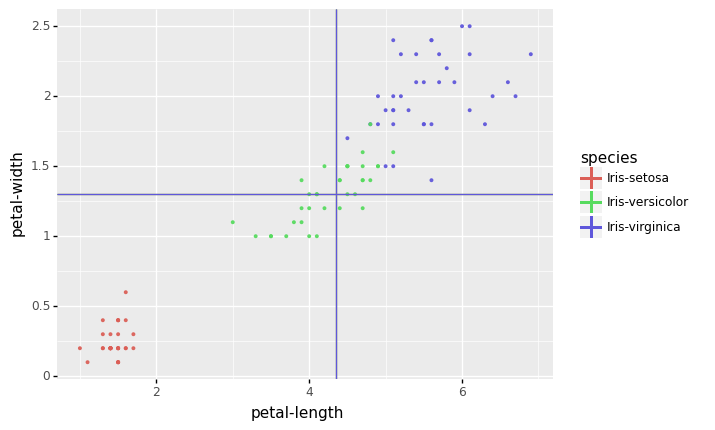

<ggplot: (183300287976)>

In [16]:
import plotly
import ggplot
from pandas import Timestamp
from plotnine import *
import warnings
warnings.filterwarnings('ignore', module='plotnine') 

(ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + 
        geom_point(alpha =0.9, size = 0.6) +
        geom_vline(train, aes(xintercept=pl_indicator, color='species')) +
        geom_hline(train, aes(yintercept=pw_indicator, color='species'))
)

For the sepals we have:

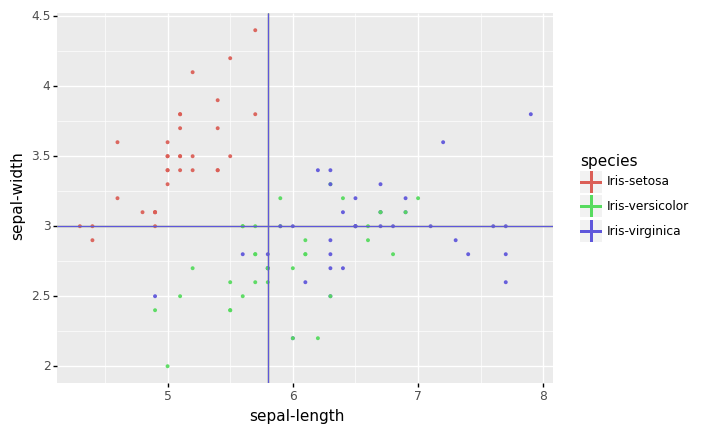

<ggplot: (183301758121)>

In [17]:
import plotly
import ggplot
from pandas import Timestamp
from plotnine import *
import warnings
warnings.filterwarnings('ignore', module='plotnine') 

(ggplot(train, aes(x='sepal-length', y='sepal-width', color='species')) + 
        geom_point(alpha =0.9, size = 0.6) +
        geom_vline(train, aes(xintercept=sl_indicator, color='species')) +
        geom_hline(train, aes(yintercept=sw_indicator, color='species'))
)

### CONCLUSION

The decision trees are the same as with the Median 80/20.<br>
The efficiency of the trees is better for `Iris virginica` (from 23.4% to 26.7%) and `Iris versicolor` (0% to 17.8%).<br>
`Iris setosa` decreases its efficiency from 46.7% to 37.8%.<br>

In conclusion, for the same decision trees it is better to use a split of 70/30 than 80/20.<br>